In [56]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re

import grakel as gk


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph/myKernels')
#from importlib import reload
#reload(readfoldertopanda)
import mmdutils
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
import MMDforGraphs as mg
importlib.reload(sys.modules['MMDforGraphs'])
from myKernels import RandomWalk as rw
import WL

In [57]:
noise1 = 0.1
block_label_probability1 = 1.0 - noise1
noise1 = noise1/2.0

noise2 = 0.14
block_label_probability2 = 1.0 - noise2
noise2 = noise2/2.0

n1 = 60
n2 = 60

probs_1 = np.array([[0.1, 0.01, 0.01], [0.01, 0.08, 0.01], [0.01, 0.01, 0.09]])
label_pmf_1 = np.array([[block_label_probability1, noise1, noise1], [noise1, block_label_probability1, noise1], [noise1, noise1, block_label_probability1]])
block_mean_1 = np.array([0,1,2])
sizes_1 = [50, 40, 40]
bg1 = mg.SBMGraphs(n = n1, sizes = sizes_1, P = probs_1, a = 'blockmean2', l = 'degreelabels', params= {'block_mean':block_mean_1, 'label_pmf':label_pmf_1}, fullyConnected=True)
bg1.Generate()

probs_2 = np.array([[0.1, 0.01, 0.01], [0.01, 0.08, 0.01], [0.01, 0.01, 0.09]])
label_pmf_2 = np.array([[block_label_probability2, noise2, noise2], [noise2, block_label_probability2, noise2], [noise2, noise2, block_label_probability2]])
block_mean_2 = np.array([0,1,2])
sizes_2 = [50, 40, 40]
bg2 = mg.SBMGraphs(n = n2, sizes = sizes_2, P = probs_2, a = 'blockmean2', l = 'degreelabels', params= {'block_mean':block_mean_2, 'label_pmf':label_pmf_2}, fullyConnected=True)
bg2.Generate()

Gs = bg1.Gs + bg2.Gs

In [58]:
X = []

for i in range(len(Gs)):
   out =  nx.shortest_path(Gs[i])
   

KeyboardInterrupt: 

In [51]:
ok = nx.get_node_attributes(G, 'attr')
ok[0]

array([3.50892907])

In [53]:
# X = []

# for g in Gs:
#     out = nx.shortest_path(g)
#     edges = []
#     edge_attributes = dict()
#     done = []
#     for k_outer, v_outer in out.items():

#         for k_inner, v_inner in v_outer.items():

#             if k_inner not in done:
#                 edges.append((k_outer, k_inner))
#                 edge_attributes[(k_outer, k_inner)] = len(v_inner)

#         done.append(k_outer)
        
#     G = nx.Graph(edges)
#     nx.set_edge_attributes(G,edge_attributes, 'path_length')
#     nx.set_node_attributes(G, nx.get_node_attributes(g, 'attr'), 'attr')

#     X.append(G)


# K = np.zeros((len(X), len(X)))

# for i in range(len(X)):
#     for j in range(i, len(X)):

#         tmp_node_i = nx.get_node_attributes(X[i], 'attr')
#         tmp_node_j = nx.get_node_attributes(X[i], 'attr')

#         for ui, vi, ai in  X[i].edges(data = True):
#             for uj, vj, aj in  X[j].edges(data = True):

#                 K[i,j] += (ai['path_length'] == aj['path_length'])*(
#                     np.exp(0.1 * np.abs(tmp_node_i[ui]-tmp_node_j[uj]))*np.exp(0.1 * np.abs(tmp_node_i[vi]-tmp_node_j[vj]))
#                   + np.exp(0.1 * np.abs(tmp_node_i[ui]-tmp_node_j[vj]))*np.exp(0.1 * np.abs(tmp_node_i[uj]-tmp_node_j[vi]))
#                 )



KeyboardInterrupt: 

In [39]:
G.nodes(True)

NodeDataView({0: {'attr': array([-1.55210957])}, 5: {'attr': array([0.86491069])}, 10: {'attr': array([0.53469567])}, 14: {'attr': array([-0.211892])}, 21: {'attr': array([-0.38195825])}, 3: {'attr': array([-0.12710798])}, 38: {'attr': array([1.13075861])}, 68: {'attr': array([0.26201087])}, 24: {'attr': array([3.55628376])}, 27: {'attr': array([-1.43816165])}, 47: {'attr': array([-0.57265709])}, 48: {'attr': array([0.52728608])}, 15: {'attr': array([1.27578608])}, 41: {'attr': array([0.40086393])}, 46: {'attr': array([2.14982499])}, 82: {'attr': array([1.40747091])}, 11: {'attr': array([1.85612169])}, 13: {'attr': array([1.25561984])}, 36: {'attr': array([0.86616284])}, 2: {'attr': array([-1.80651606])}, 19: {'attr': array([1.07955779])}, 44: {'attr': array([0.4368307])}, 51: {'attr': array([1.46199653])}, 55: {'attr': array([-0.06316782])}, 64: {'attr': array([0.07788928])}, 71: {'attr': array([-0.14508014])}, 77: {'attr': array([0.60864565])}, 103: {'attr': array([0.16469141])}, 52:

In [73]:
bg1.Generate()
bg2.Generate()


# Works
# Note that if we scale, we scale each dimension in both samples if [1,2,1] are attributes in sample 1 and [4,4,5] are attribute in sample 2. The we perform scaling on [1,2,1,4,4,5].
# So if the attributes have different scales then the mean will be somewhere between (2.8 in this case) and the resulting scaled attributes are [-1.83, -0.83, -1.83,  1.16,  1.16, 2.16]
# and the test will still be rejected...Should not scale but it does not really matter.
# kernel = hashkernel.HashKernel(base_kernel = 'WL_kernel', param = {'iterations':20,
#                                                                     'lsh_bin_width':0.1, 
#                                                                     'sigma':1,
#                                                                     'normalize':True,
#                                                                     'scale_attributes':False,
#                                                                     'attr_name': 'attr',
#                                                                     'label_name':'label',
#                                                                     'wl_iterations':0,
#                                                                     'normalize':True})
# K = kernel.fit_transform(Gs)

# works but slow#
# kernel = GraphInvariant.GIK(local = True, label_name = 'label', attr_name= 'attr', params = {'wl_itr':4,'distances':3,  'c':0.1,'normalize':False })
# K = kernel.fit_transform(Gs)

# prop
# kernel = [{"name": "propagation", "t_max": 4, "w":0.05, 'with_attributes':True, "M":"L2"}]


# works
# kernel = [{"name": "GH", 'kernel_type':('gaussian', 0.1)}]
# init_kernel = gk.GraphKernel(kernel= kernel, normalize=False)
# graph_list = gk.graph_from_networkx(Gs, node_labels_tag= 'attr')
# K = init_kernel.fit_transform(graph_list)


#kernel = [{"name": "SP", 'as_attributes':True}]

#init_kernel = gk.GraphKernel(kernel= kernel, normalize=False, n_jobs=4)
#graph_list = gk.graph_from_networkx(Gs, node_labels_tag= 'attr')
#K = init_kernel.fit_transform(graph_list)

# rw 
p = [np.array([i[1][0] for i in G.nodes('attr') ]) for G in Gs ]
init_kernel = rw.RandomWalk(Gs, c = 0.1, p = p, q = None)
K = init_kernel.fit(calc_type = 'p-rw', 
                                r = 12, 
                                k = 3,
                                mu_vec = None,
                                normalize_adj = False, 
                                row_normalize_adj = False,
                                label_list = None,
                                edge_labels=None,
                                verbose = True
                                )

# # print(issymmetric(K))

MMD_functions = [mg.MMD_b, mg.MMD_u]

# initialize bootstrap class, we only want this to be initalized once so that numba njit
# only gets compiled once (at first call)
kernel_hypothesis = mg.BoostrapMethods(MMD_functions)
function_arguments=[dict(n = n1, m = n2 ), dict(n = n1, m = n2 )]
kernel_hypothesis.Bootstrap(K, function_arguments, B = 1000)
print(kernel_hypothesis.p_values)

100%|██████████| 7260/7260.0 [00:01<00:00, 6886.74it/s] 


{'MMD_b': 0.873, 'MMD_u': 0.873}


In [7]:
np.mean([1,2,1,4,4,5])

2.8333333333333335

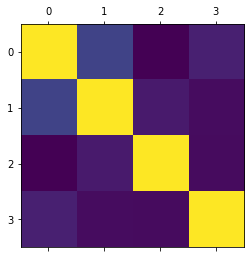

In [5]:
plt.matshow(K)

In [6]:
from sklearn import preprocessing as pre
pre.scale(colors_0,with_std=False)

array([[-2.61845036e-01],
       [-2.52069909e+00],
       [-7.16620121e-01],
       [-5.06094144e-01],
       [-1.15179991e+00],
       [-1.45401442e+00],
       [-3.28425557e+00],
       [-3.27853268e-02],
       [-2.77582229e+00],
       [-2.87498410e+00],
       [ 7.83504139e-01],
       [-8.91529418e-01],
       [-1.49567975e+00],
       [-5.36257162e-01],
       [-2.97199465e+00],
       [-6.73186073e-01],
       [ 8.26876861e-02],
       [-1.39115538e+00],
       [-1.62921206e+00],
       [-3.03558884e+00],
       [-3.63734657e-01],
       [-3.02674012e+00],
       [-1.94356701e+00],
       [-1.66280795e+00],
       [-8.99193137e-01],
       [-1.76313829e+00],
       [ 2.45589061e-02],
       [ 3.28217517e-01],
       [-2.10445819e-01],
       [-2.44771729e+00],
       [-7.53798680e-01],
       [ 4.40846043e-01],
       [ 7.86793322e-01],
       [-6.85982082e-01],
       [-8.51119657e-01],
       [-1.40794485e+00],
       [-4.76152371e-01],
       [-1.74011843e-01],
       [ 2.2

In [8]:
colors_0# - np.mean(colors_0)

array([[ 9.42915249e-01],
       [-1.31593881e+00],
       [ 4.88140164e-01],
       [ 6.98666141e-01],
       [ 5.29603760e-02],
       [-2.49254134e-01],
       [-2.07949529e+00],
       [ 1.17197496e+00],
       [-1.57106200e+00],
       [-1.67022381e+00],
       [ 1.98826442e+00],
       [ 3.13230868e-01],
       [-2.90919460e-01],
       [ 6.68503123e-01],
       [-1.76723436e+00],
       [ 5.31574212e-01],
       [ 1.28744797e+00],
       [-1.86395100e-01],
       [-4.24451780e-01],
       [-1.83082855e+00],
       [ 8.41025628e-01],
       [-1.82197983e+00],
       [-7.38806720e-01],
       [-4.58047666e-01],
       [ 3.05567148e-01],
       [-5.58378003e-01],
       [ 1.22931919e+00],
       [ 1.53297780e+00],
       [ 9.94314466e-01],
       [-1.24295700e+00],
       [ 4.50961605e-01],
       [ 1.64560633e+00],
       [ 1.99155361e+00],
       [ 5.18778203e-01],
       [ 3.53640628e-01],
       [-2.03184567e-01],
       [ 7.28607914e-01],
       [ 1.03074844e+00],
       [ 1.4